To upload local file in google colab

In [2]:
from google.colab import files
# Upload the CSV file from your computer if you are on Google Collab
uploaded = files.upload()

Saving household_power_consumption.txt to household_power_consumption.txt


Librairies

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed, Dropout
from tensorflow.keras.callbacks import EarlyStopping

Part 1 : Data Import And Initial Exploration

Import the necessary libraries for data analysis and visualization.
Load the time-series dataset from the provided file.
Display the first few rows of the dataset to understand its structure.
Check the data types of each column and the shape of the dataset.

In [27]:
#Load the dataset
df = pd.read_csv('household_power_consumption.txt', sep= ';')

#Display the first few rows to understand the structure
print(df.head())

#Check data types of each column
print(df.dtypes)

#Check the shape of the dataset (rows, columns)
print(df.shape)


         Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0  
Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     obje

/tmp/ipython-input-27-2345840797.py:2: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('household_power_consumption.txt', sep= ';')


In [28]:
# Get the names of the problematic columns by index
columns_with_mixed_types = df.columns[[2, 3, 4, 5, 6, 7]]

# Loop through each column and print unique values that are not obviously numeric
for col in columns_with_mixed_types:
    unique_vals = df[col].dropna().unique()
    print(f"\nUnique values in column '{col}':")
    print(unique_vals)



Unique values in column 'Global_active_power':
['4.216' '5.360' '5.374' ... 4.068 3.94 3.74]

Unique values in column 'Global_reactive_power':
['0.418' '0.436' '0.498' '0.502' '0.528' '0.522' '0.520' '0.510' '0.470'
 '0.478' '0.398' '0.422' '0.282' '0.152' '0.156' '0.000' '0.076' '0.090'
 '0.200' '0.058' '0.180' '0.144' '0.118' '0.108' '0.202' '0.192' '0.186'
 '0.116' '0.136' '0.148' '0.160' '0.158' '0.100' '0.082' '0.050' '0.052'
 '0.162' '0.086' '0.048' '0.054' '0.068' '0.166' '0.174' '0.178' '0.188'
 '0.088' '0.080' '0.070' '0.084' '0.074' '0.106' '0.092' '0.064' '0.046'
 '0.138' '0.134' '0.132' '0.120' '0.130' '0.154' '0.078' '0.142' '0.140'
 '0.146' '0.150' '0.170' '0.102' '0.072' '0.060' '0.056' '0.062' '0.112'
 '0.066' '0.172' '0.168' '0.194' '0.184' '0.096' '0.164' '0.182' '0.094'
 '0.098' '0.176' '0.190' '0.204' '0.220' '0.198' '0.208' '0.244' '0.334'
 '0.298' '0.296' '0.286' '0.278' '0.104' '0.258' '0.238' '0.256' '0.214'
 '0.230' '0.210' '0.240' '0.124' '0.122' '0.270' '0.3

In [29]:
columns_to_fix = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']

for col in columns_to_fix:
    # Replace '?' with NaN, then convert all to numeric
    df[col] = (
        df[col]
        .replace('?', np.nan)           # Replace '?' with NaN
        .astype(str)                    # Ensure all values are strings
        .str.strip()                    # Remove any extra whitespace
        .replace('', np.nan)            # Replace empty strings with NaN too
        .apply(lambda x: x.replace(',', '') if isinstance(x, str) else x)  # Remove thousands separators if needed
        .astype(float)                  # Convert to float
    )

print(df[columns_to_fix].head())
print(df[columns_to_fix].dtypes)

   Global_active_power  Global_reactive_power  Voltage  Global_intensity  \
0                4.216                  0.418   234.84              18.4   
1                5.360                  0.436   233.63              23.0   
2                5.374                  0.498   233.29              23.0   
3                5.388                  0.502   233.74              23.0   
4                3.666                  0.528   235.68              15.8   

   Sub_metering_1  Sub_metering_2  
0             0.0             1.0  
1             0.0             1.0  
2             0.0             2.0  
3             0.0             1.0  
4             0.0             1.0  
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
dtype: object


Part 2 : Handling Missing Values

Identify columns in the dataset that contain missing values.
Fill the missing values using the mean of the respective columns.
Verify that there are no more missing values in the dataset.

In [30]:
print(df.isnull().sum())
df= df.fillna(df.mean(numeric_only=True))
print(df.isnull().sum())


Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64
Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


Part 3 : Data Visualization

Resample the ‘Global_active_power’ column over a day and plot the sum and mean values.
Create a plot showing the mean and standard deviation of the ‘Global_intensity’ column resampled over a day.

In [31]:
# Combine date & time
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'],
                                format='%d/%m/%Y %H:%M:%S')

# Set as index
df.set_index('DateTime', inplace=True)

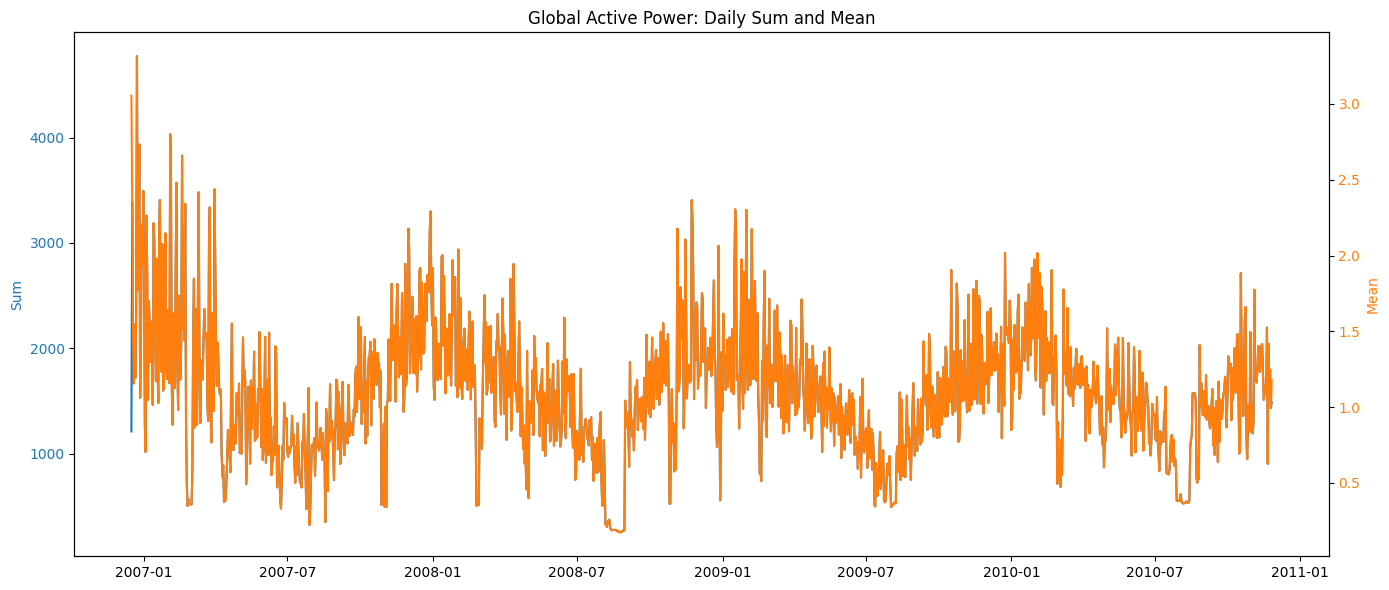

In [32]:
# Resample over a day
power_daily_sum = df['Global_active_power'].resample('D').sum()
power_daily_mean = df['Global_active_power'].resample('D').mean()

# Plot
fig, ax1 = plt.subplots(figsize=(14,6))

ax1.plot(power_daily_sum.index, power_daily_sum.values, color='tab:blue', label='Daily Sum')
ax1.set_ylabel('Sum', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(power_daily_mean.index, power_daily_mean.values, color='tab:orange', label='Daily Mean')
ax2.set_ylabel('Mean', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title('Global Active Power: Daily Sum and Mean')
fig.tight_layout()
plt.show()


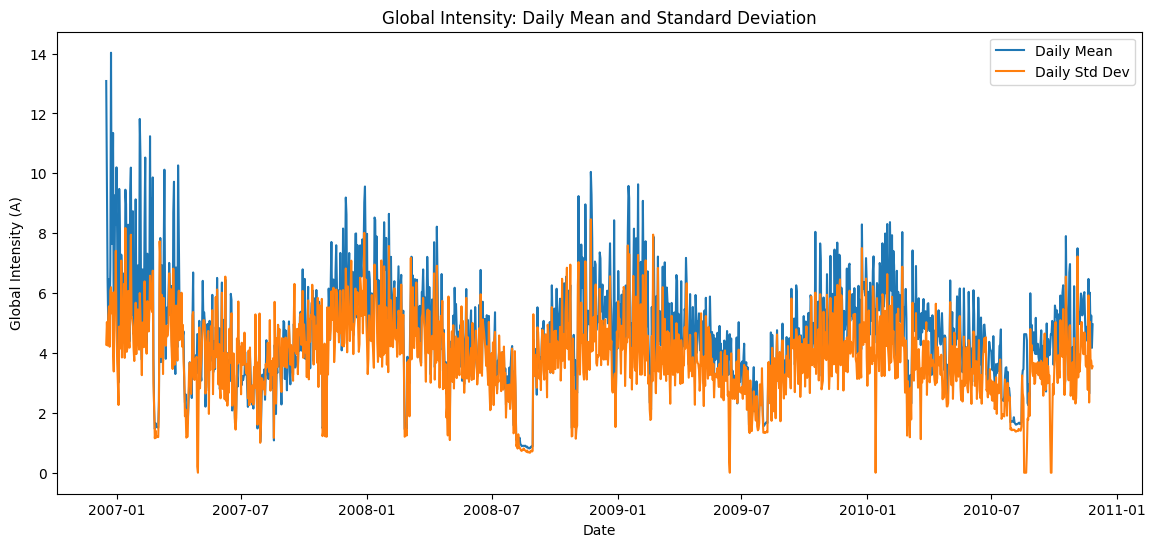

In [33]:
# Resample over a day
intensity_daily_mean = df['Global_intensity'].resample('D').mean()
intensity_daily_std = df['Global_intensity'].resample('D').std()

# Plot
plt.figure(figsize=(14, 6))

plt.plot(intensity_daily_mean.index, intensity_daily_mean.values, label='Daily Mean')
plt.plot(intensity_daily_std.index, intensity_daily_std.values, label='Daily Std Dev')

plt.title('Global Intensity: Daily Mean and Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Global Intensity (A)')
plt.legend()
plt.show()

Part 4 : Data Preprocessing For LSTM

Normalize the dataset to prepare it for LSTM model training.
Split the dataset into training and testing sets.
Reshape the data to fit the input requirements of an LSTM model.

In [34]:
# Drop old columns 'Date' and 'Time'
df.drop(columns=['Date', 'Time'], inplace=True)

# Make sure DateTime is index or a column
# If DateTime is index, you can just sort index
df = df.sort_index()

# Example: selecting feature column(s)
features = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']  # add more if you want multivariate LSTM

# Extract feature values as numpy array
data = df[features].values

# Initialize scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the data
data_scaled = scaler.fit_transform(data)

train_size = int(len(data_scaled) * 0.8)
test_size = len(data_scaled) - train_size

train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

#Create sequences for LSTM input
def create_sequences(data, time_steps=10, future_steps=3):
    X, y = [], []
    for i in range(len(data) - time_steps - future_steps + 1):
        X.append(data[i:(i + time_steps)])
        y.append(data[(i + time_steps):(i + time_steps + future_steps)])
    return np.array(X), np.array(y)

time_steps = 10
future_steps = 3

X_train, y_train = create_sequences(train_data, time_steps, future_steps)
X_test, y_test = create_sequences(test_data, time_steps, future_steps)

print("X_train shape:", X_train.shape)  # (samples, time_steps, features)
print("y_train shape:", y_train.shape)  # (samples, future_steps, features)


X_train shape: (1660195, 10, 6)
y_train shape: (1660195, 3, 6)


In [19]:
print(np.isnan(X_train).sum(), np.isnan(y_train).sum())
print(np.isinf(X_train).sum(), np.isinf(y_train).sum())

688920 206676
0 0


Part 5 : Building An LSTM Model

Import the necessary libraries for building an LSTM model.
Define the architecture of the LSTM model, including the number of layers and neurons.
Compile the model with an appropriate loss function and optimizer.


In [35]:
# Parameters
time_steps = 10      # input sequence length
num_features = 6     # number of features per time step
future_steps = 3     # number of steps to predict

# Define the model
model = Sequential()

# First LSTM layer - returns sequences so the next LSTM gets full sequence
model.add(LSTM(64, return_sequences=True, input_shape=(time_steps, num_features)))
model.add(Dropout(0.2))  # Optional: helps prevent overfitting

# Second LSTM layer - also returns sequences to match multi-step output
model.add(LSTM(32, return_sequences=False))
model.add(Dropout(0.2))

# Extra Dense layer for non-linearity
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

# Dense layer to expand to future_steps * features
model.add(Dense(future_steps * num_features))

# Reshape output to (future_steps, num_features)
model.add(tf.keras.layers.Reshape((future_steps, num_features)))

model.compile(optimizer='adam', loss='mse')
model.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 10, 64)         │        18,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 18)             │         1,170 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 3, 6)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,874 (132.32 KB)

 Trainable params: 33,874 (132.32 KB)

 Non-trainable params: 0 (0.00 B)

Part 6 : Training And Evaluating The LSTM Model

Train the LSTM model on the training dataset.
Evaluate the model’s performance on the testing dataset.
Plot the training and validation loss to assess the model’s learning progress.

Epoch 1/50
3243/3243 - 23s - 7ms/step - loss: 0.0013 - val_loss: 9.2694e-04
Epoch 2/50
3243/3243 - 40s - 12ms/step - loss: 0.0013 - val_loss: 9.3151e-04
Epoch 3/50
3243/3243 - 23s - 7ms/step - loss: 0.0013 - val_loss: 9.2471e-04
Epoch 4/50
3243/3243 - 41s - 13ms/step - loss: 0.0013 - val_loss: 9.2212e-04
Epoch 5/50
3243/3243 - 25s - 8ms/step - loss: 0.0012 - val_loss: 9.2483e-04
Epoch 6/50
3243/3243 - 39s - 12ms/step - loss: 0.0012 - val_loss: 9.1790e-04
Epoch 7/50
3243/3243 - 40s - 12ms/step - loss: 0.0012 - val_loss: 9.1490e-04
Epoch 8/50
3243/3243 - 42s - 13ms/step - loss: 0.0012 - val_loss: 9.2467e-04
Epoch 9/50
3243/3243 - 40s - 12ms/step - loss: 0.0012 - val_loss: 9.3643e-04
Epoch 10/50
3243/3243 - 41s - 13ms/step - loss: 0.0012 - val_loss: 9.2316e-04
Epoch 11/50
3243/3243 - 40s - 12ms/step - loss: 0.0012 - val_loss: 9.2373e-04
Epoch 12/50
3243/3243 - 23s - 7ms/step - loss: 0.0012 - val_loss: 9.2349e-04
12970/12970 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - loss: 9.0306e-04
Test MSE Los

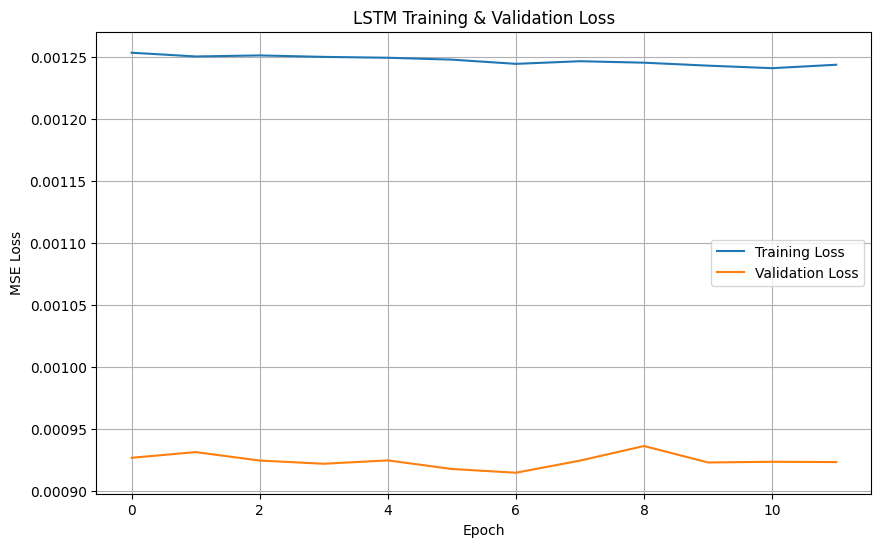

In [41]:
#Define EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',      # What to monitor
    patience=5,              # Number of epochs with no improvement to wait
    restore_best_weights=True  # Go back to the best epoch
)


#Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,           # adjust as needed
    batch_size=512,       # adjust for your GPU/CPU
    validation_data=(X_test, y_test),
    verbose=2,            # see progress bar
    shuffle=False,           # Important for time series!
    callbacks=[early_stop]
)

#Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print(f'Test MSE Loss: {test_loss:.4f}')

#Plot training vs. validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()